In [89]:
#importing libraries
import sklearn
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV



In [7]:
#data = pd.read_csv("C:\\Project\\avocado1.csv")
df = pd.read_csv("/Users/twmrgwzln/Downloads/avocado.csv")

# Basic info about the data


In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [11]:
data.groupby('type').groups

{'conventional': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'organic': [9126, 9127, 9128, 9129, 9130, 9131, 9132, 9133, 9134, 9135, 9136, 9137, 9138, 9139, 9140, 9141, 9142, 9143, 9144, 9145, 9146, 9147, 9148, 9149, 9150, 9151, 9152, 9153, 9154, 9155, 9156, 9157, 9158, 9159, 9160, 9161, 9162, 9163, 9164, 9165, 9166, 9167, 9168, 9169, 9170, 9171, 9172, 9173, 9174, 9175, 9176, 9177, 9178, 9179, 9180, 9181, 9182, 9183, 9184, 9185, 9186, 9187, 9188, 9189, 9190, 9191, 9192, 9193, 9194, 9195, 9196, 9197, 9198, 9199, 9200, 9201, 9202, 9203, 9204, 9205, 9206, 9207, 9208, 9209, 9210, 9211, 9212, 9213, 9214, 9215, 9216, 9217, 9218, 9219, 9220, 9221

In [13]:
df.shape

(18249, 14)

In [16]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [63]:
df['type'] = df['type'].replace({"conventional": 1, "organic": 0})

In [64]:
df['type'].value_counts()

1    9126
0    9123
Name: type, dtype: int64

# Exploring dataset

We will show the avg price of an avocado by date

Avegrage price by the density of the avocado

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

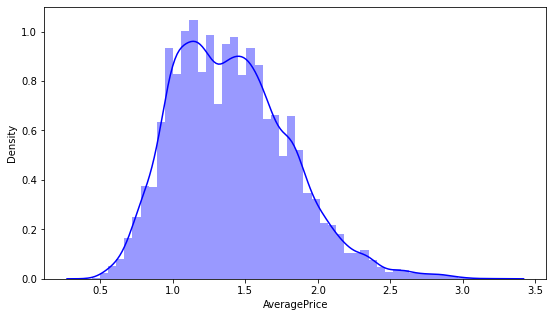

In [65]:
plt.figure(figsize = (9, 5))
sns.distplot(df['AveragePrice'], color = 'b')

The diffrence average price between the two types

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

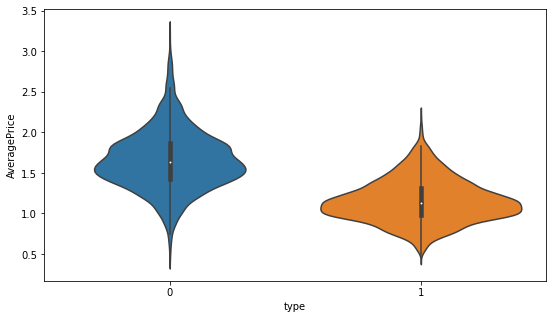

In [66]:
plt.figure(figsize = (9, 5))
sns.violinplot(y = 'AveragePrice', x = 'type', data =df)

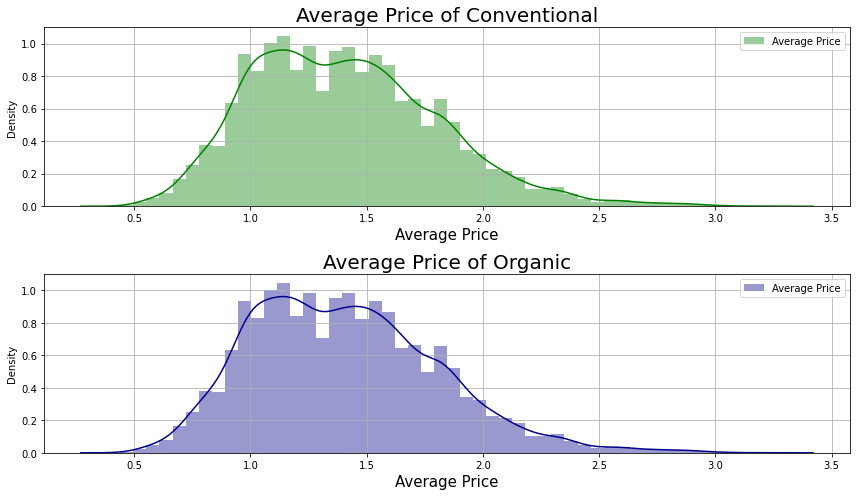

In [67]:
f,ax = plt.subplots(figsize = (12,7))
plt.subplot(2,1,1) 
sns.distplot(df.AveragePrice,color="green",label="Average Price");
plt.title("Average Price of Conventional",fontsize = 20)
plt.xlabel('Average Price',fontsize = 15)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
sns.distplot(df.AveragePrice,color="darkblue",label="Average Price");
plt.title("Average Price of Organic",fontsize = 20)
plt.xlabel('Average Price',fontsize = 15)
plt.tight_layout() 
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Avocado')

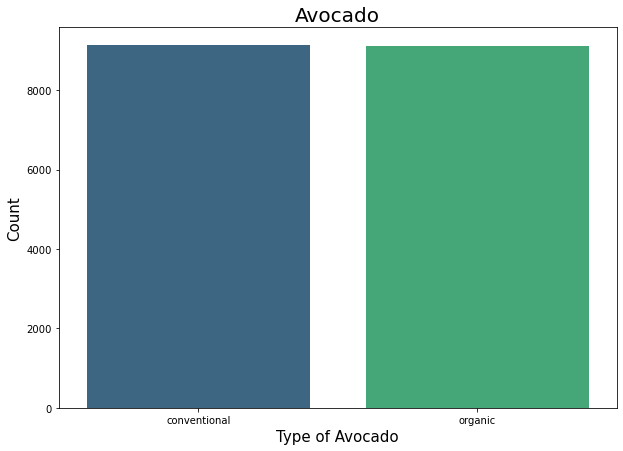

In [68]:
f,ax = plt.subplots(figsize = (10,7))
ax = sns.countplot(x=data.type,label="Count",palette="viridis")
plt.xlabel('Type of Avocado',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Avocado',fontsize = 20)

<AxesSubplot:xlabel='Date'>

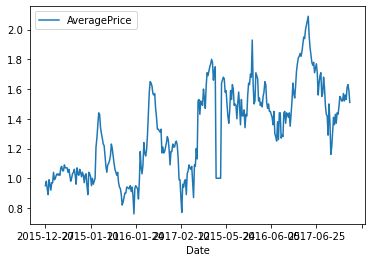

In [69]:
PREDICTING_FOR = "TotalUS"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)
date_price.plot(x='Date', y='AveragePrice', kind="line")

The amount of avocados sold by each year

Text(0, 0.5, 'Average Price')

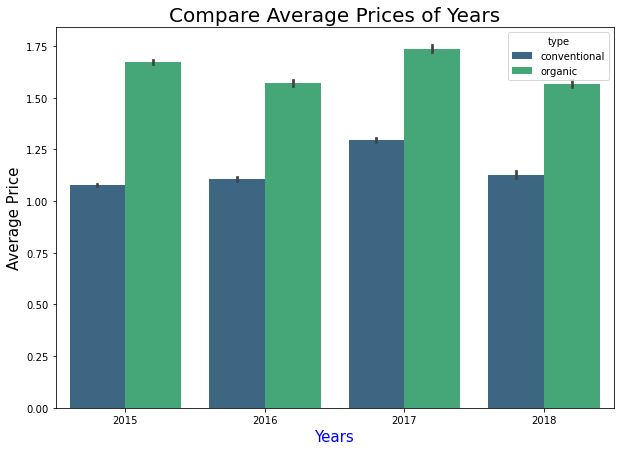

In [70]:
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x="year", y="AveragePrice",hue="type",data=data,palette="viridis")
plt.title("Compare Average Prices of Years",fontsize = 20)
plt.xlabel('Years',fontsize = 15,color='b')
plt.ylabel('Average Price',fontsize = 15)

## Corroletion between the data

<AxesSubplot:>

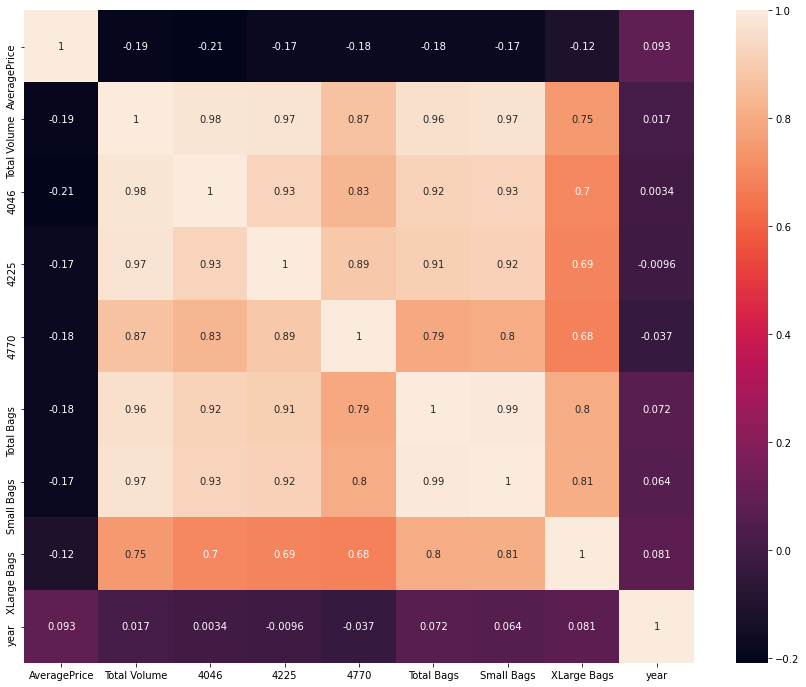

In [71]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df[['AveragePrice', 'Total Volume', '4046', '4225' ,'4770','Total Bags','Small Bags', 'XLarge Bags','year']].corr(),annot=True)

In [73]:
df.drop(['region','Date'], axis=1, inplace=True)



# Prediction


In [82]:
X = df.drop(columns=['AveragePrice'])
Y = df['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state = 7)

In [93]:
LinearModel = LinearRegression()
LinearModel.fit(X_train, y_train)
LinearPredictions = LinearModel.predict(X_test)
folds = KFold(n_splits = 4, shuffle = True, random_state = 42)
l_scores = cross_val_score(LinearModel, X_train, y_train, scoring='accuracy', cv=folds)
print(l_scores)
np.mean(l_scores)

[nan nan nan nan]


nan